In [4]:
import pandas as pd

# Using this library for chart creation:
import matplotlib.pyplot as plt

# Openning our table:
df = pd.read_csv('D:\\Desktop\\Study\\100 Days of Code - The Complete Python Pro Bootcamp for 2021\\DATA\\Programming Languages\\QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [6]:
# When we type check the contents of this cell, we see that we are not
# dealing with a date object, but rather with a string:
type(df["DATE"][1])

str

In [10]:
# Let's use Pandas' to_datetime() to convert the entire df['DATE'] column:
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [11]:
# If We want to change the form of our table, we can use the pivot() method:
# Here's how you pivot our existing DataFrame to get the outcome above:
# The index are the categories for the rows. The columns are the categories for the columns.
# And the values are what you want in the new cells.

reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [12]:
# In this case, we don't want to drop the rows that have a NaN value.
# Instead, we want to substitute the number 0 for each NaN value in the DataFrame.
# We can do this with the .fillna() method:
reshaped_df.fillna(0, inplace=True)

In [13]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


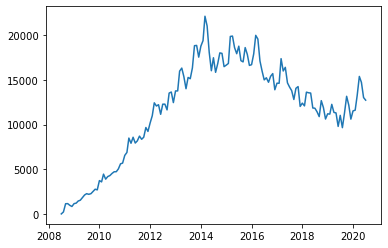

In [14]:
# MATPLOTLIB:
# To create our first charts we're going to use a library called Matplotlib.
# There are many different libraries in Python to help us create charts and graphs.
# Matplotlib is an incredibly popular one and it works beautifully in combination with Pandas,
# so let's check it out.

# You can actually show a line chart for the popularity of a programming language using only
# a single line of code.
plt.plot(reshaped_df.index, reshaped_df['java'])

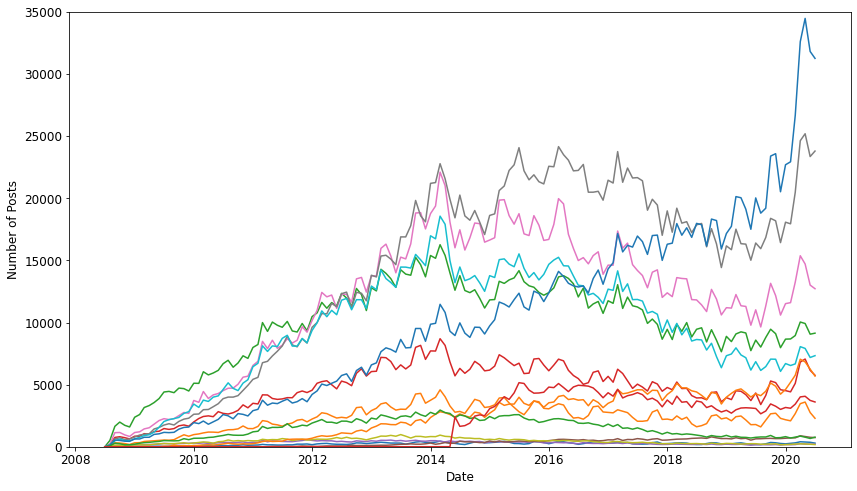

In [15]:
# To make our chart larger we can provide a width (16) and a height (10) as the figsize
# of the figure.
# plt.figure(figsize=(16,10))
# plt.plot(reshaped_df.index, reshaped_df.java)

# This will make our chart easier to see. But when we increase the size of the chart,
# we should also increase the fontsize of the ticks on our axes so that they remain easy
# to read:
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# Now we can add labels. Also, we're never going to get less than 0 posts,
# so let's set a lower limit of 0 for the y-axis with .ylim().
# plt.xlabel('Date', fontsize=14)
# plt.ylabel('Number of Posts', fontsize=14)
# plt.ylim(0, 35000)

# But what if we wanted to plot all the programming languages on the same chart?
# We don't want to type out .plot() a million times, right? We can actually just use
# a for-loop:
# for column in reshaped_df.columns:
# plt.plot(reshaped_df.index, reshaped_df[column])
# This will allow us to iterate over each column in the DataFrame and plot it on our chart.

# The final result should look like this:

plt.figure(figsize=(14, 8))  # make chart larger
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])


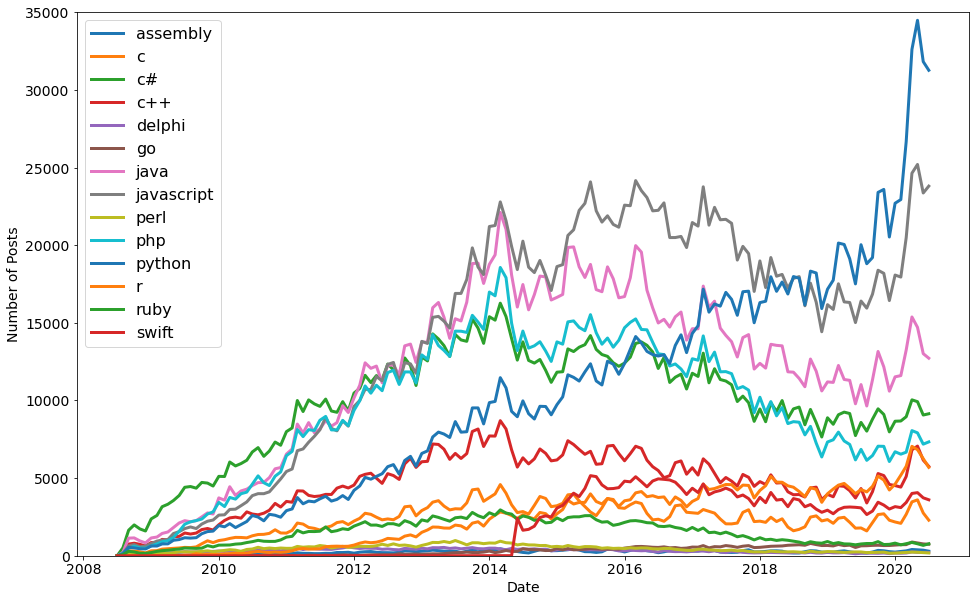

In [16]:
# But wait, which language is which? It's really hard to make out without a legend
# that tells us which colour corresponds to each language. Let's modify the plotting code
# to add a label for each line based on the column name (and make the lines thicker at the
# same time using linewidth). Then let's add a legend to our chart:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

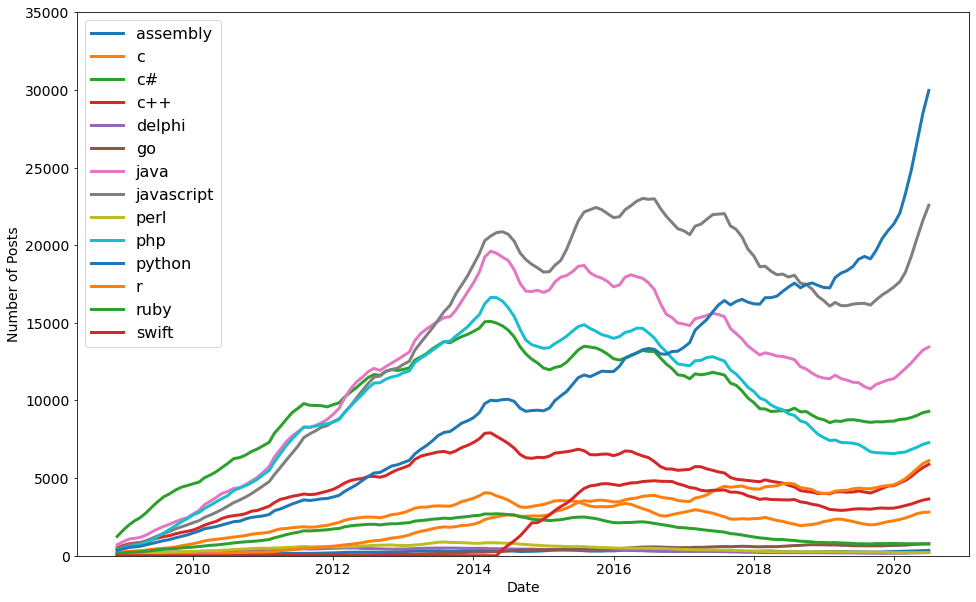

In [17]:
# SMOOTHING out Time-Series Data
# Looking at our chart we see that time-series data can be quite noisy, with a lot of
# up and down spikes. This can sometimes make it difficult to see what's going on.
# A useful technique to make a trend apparent is to smooth out the observations by
# taking an average. By averaging say, 6 or 12 observations we can construct something
# called the rolling mean. Essentially we calculate the average in a window of
# time and move it forward by one observation at a time.
# Since this is such a common technique, Pandas actually two handy methods
# already built-in: rolling() and mean(). We can chain these two methods up to
# create a DataFrame made up of the averaged observations.

# The window is number of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

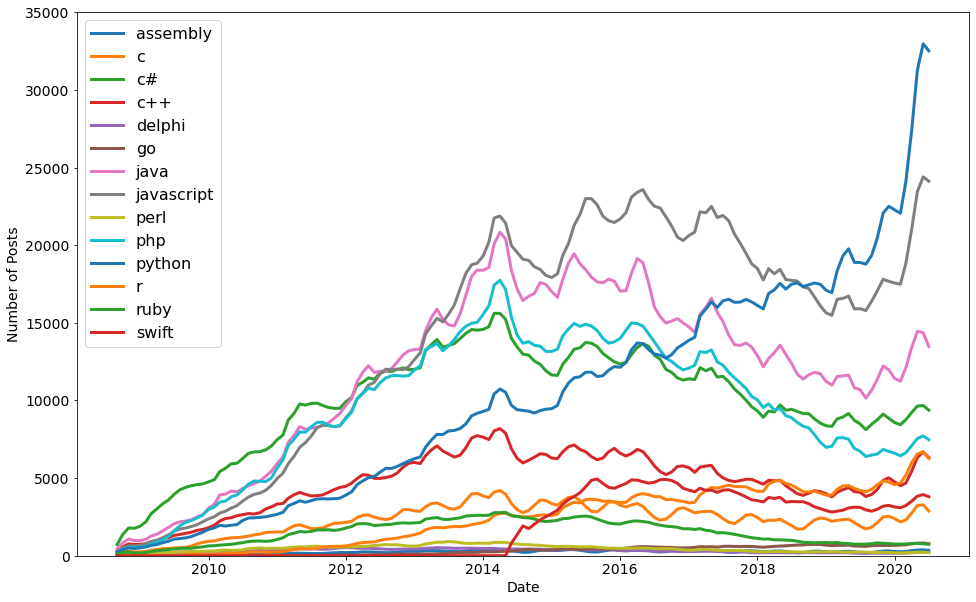

In [18]:
# Using the window argument = 3 for example instead of 6:
roll_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

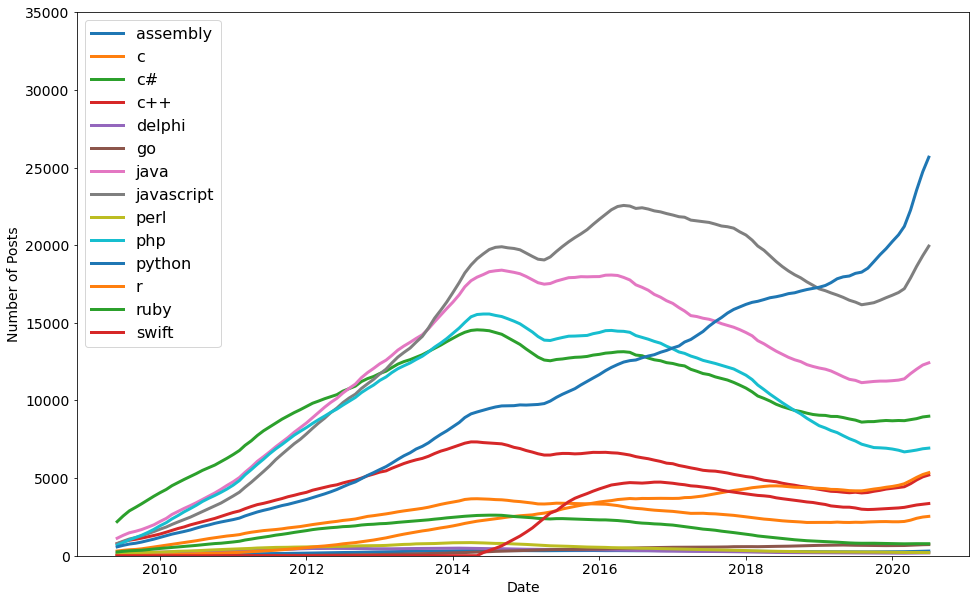

In [20]:
# Using the window argument = 12 for example instead of 6:
roll_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

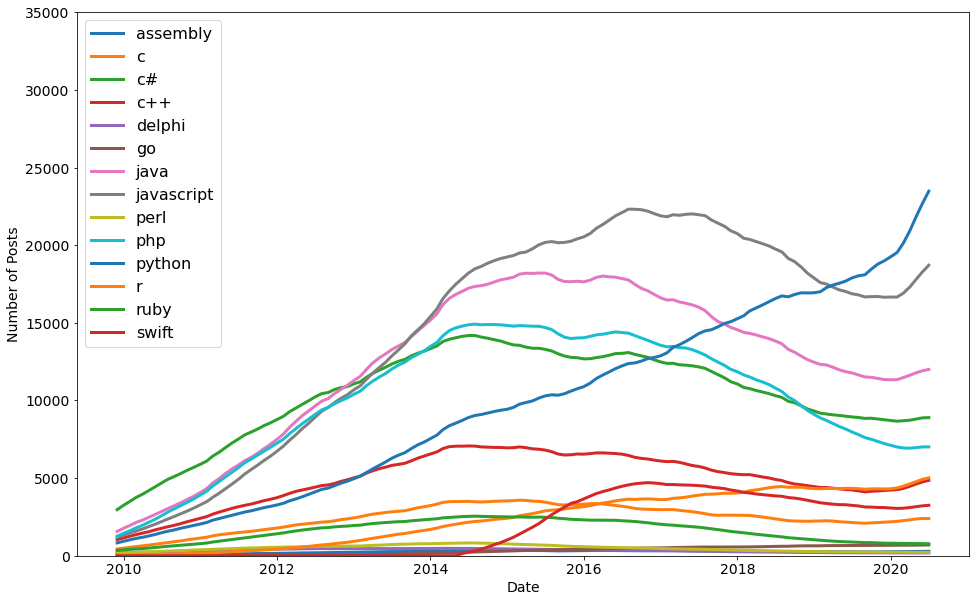

In [21]:
# Using the window argument = 18 for example instead of 6:
roll_df = reshaped_df.rolling(window=18).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)